In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

/Users/tienhuynh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#LOAD STOPWORDS
file = open('./stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [3]:
review = pd.read_csv("./review_normalized.csv")
review

id                           name  \
0       113317  Casablanca Hotel Times Square   
1       113317  Casablanca Hotel Times Square   
2       113317  Casablanca Hotel Times Square   
3       113317  Casablanca Hotel Times Square   
4       113317  Casablanca Hotel Times Square   
...        ...                            ...   
239161  235513          Sofitel Washington DC   
239162  235513          Sofitel Washington DC   
239163  235513          Sofitel Washington DC   
239164  235513          Sofitel Washington DC   
239165  235513          Sofitel Washington DC   

                                              description  \
0       Experience the magic of Times Square just step...   
1       Experience the magic of Times Square just step...   
2       Experience the magic of Times Square just step...   
3       Experience the magic of Times Square just step...   
4       Experience the magic of Times Square just step...   
...                                                   ...   
239161  Sofitel Washington DC Lafayette Square represe...   
239162  Sofitel Washington DC Lafayette Square represe...   
239163  Sofitel Washington DC Lafayette Square represe...   
239164  Sofitel Washington DC Lafayette Square represe...   
239165  Sofitel Washington DC Lafayette Square represe...   

                                                   review  hotel_class  \
0       We had a whisper-quiet queen deluxe room couty...          4.0   
1       Great 3 night stay right after Thanksgiving. A...          4.0   
2       I hesitate to give this little gem a stellar r...          4.0   
3       You won't find a more conveniently located hot...          4.0   
4       This small boutique hotel right off Times Squa...          4.0   
...                                                   ...          ...   
239161  Beautifully decorated and comfortable rooms ev...          4.0   
239162  I was there with my girlfriend for 4 days at t...          4.0   
239163  Upscale hotel in downtown DC. Walking distance...          4.0   
239164  All expectations for service and accommodation...          4.0   
239165  Excellent location, only steps from The White ...          4.0   

        no_of_amenities     price_level  dist_to_metro  no_of_attractions  \
0                    50  very expensive        130.960                  5   
1                    50  very expensive        130.960                  5   
2                    50  very expensive        130.960                  5   
3                    50  very expensive        130.960                  5   
4                    50  very expensive        130.960                  5   
...                 ...             ...            ...                ...   
239161               79  very expensive        347.214                  3   
239162               79  very expensive        347.214                  3   
239163               79  very expensive        347.214                  3   
239164               79  very expensive        347.214                  3   
239165               79  very expensive        347.214                  3   

        award  ...  sleep_quality  rooms  check_in_front_desk  \
0           1  ...            5.0    5.0                  4.0   
1           1  ...            5.0    4.0                  4.0   
2           1  ...            5.0    5.0                  4.0   
3           1  ...            5.0    4.0                  4.0   
4           1  ...            4.0    4.0                  4.0   
...       ...  ...            ...    ...                  ...   
239161      1  ...            5.0    4.0                  4.0   
239162      1  ...            5.0    4.0                  4.0   
239163      1  ...            5.0    4.0                  4.0   
239164      1  ...            5.0    4.0                  4.0   
239165      1  ...            5.0    4.0                  4.0   

        business_service  ratings  \
0                    4.0      5.0   
1                    

In [4]:
# Drop specified columns from the 'review' DataFrame
review.drop(
# List of columns to drop
    columns=["name", "description", 'normalized_description', "normalized_name", 'target'],
    inplace=True
)

In [5]:
# Display a summary of the 'review' DataFrame, including the number of entries,
# column names, data types, and memory usage
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239166 entries, 0 to 239165
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   239166 non-null  int64  
 1   review               239166 non-null  object 
 2   hotel_class          239166 non-null  float64
 3   no_of_amenities      239166 non-null  int64  
 4   price_level          239166 non-null  object 
 5   dist_to_metro        239166 non-null  float64
 6   no_of_attractions    239166 non-null  int64  
 7   award                239166 non-null  int64  
 8   no_of_reviews        239166 non-null  int64  
 9   service              239166 non-null  float64
 10  cleanliness          239166 non-null  float64
 11  value                239166 non-null  float64
 12  location             239166 non-null  float64
 13  sleep_quality        239166 non-null  float64
 14  rooms                239166 non-null  float64
 15  check_in_front_de

Class Type:

The DataFrame is a structured data type from the Pandas library, which is designed for handling tabular data (like a spreadsheet or SQL table).
Number of Entries:

The DataFrame has 239,166 entries (rows). This indicates a large dataset, potentially consisting of numerous hotel reviews or similar records.
Index Range:

The entries are indexed from 0 to 239,165, meaning the DataFrame is zero-indexed (the first entry is at index 0 and the last entry is at index 239,165).
Total Columns:

There are 20 columns in the DataFrame. Each column typically represents a different attribute or feature of the data, such as reviews, ratings, hotel classes, etc.
Non-Null Count:

Each column shows a non-null count of 239,166. This indicates that there are no missing values in any of the columns. Having complete data is crucial for analysis, as missing values can lead to inaccurate results.
Data Types:

The data types for the columns are as follows:
int64: There are 5 integer columns. These columns likely represent countable attributes, such as the number of amenities, reviews, etc.
float64: There are 11 columns with floating-point numbers. These columns could represent ratings, distances, and other numerical measurements where decimal values are relevant.
object: There are 4 columns with object data types, which typically contain text (strings), such as the actual review content, hotel class labels, and sentiment classifications.

In [6]:
# Change 'neutral' to 'negative' using replace
review['sentiment'] = review['sentiment'].replace("neutral", "negative")

In [7]:
# Define the bin edges for categorizing hotel classes
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]

# Define the labels corresponding to each bin
labels = ['Tourist', 'Standard', 'Comfort', 'First Class', 'Luxury']

# Categorize the 'hotel_class' column into defined bins and assign labels
review['hotel_class'] = pd.cut(
    review['hotel_class'],   # Column to categorize
    bins=bins,              # Bin edges
    labels=labels,          # Corresponding labels for each bin
    include_lowest=True     # Include the lowest bin edge in the first interval
)

# Convert the 'hotel_class' column to object data type for further use
review['hotel_class'] = review['hotel_class'].astype('object')


Using labels like 'Tourist', 'Standard', 'Comfort', 'First Class', and 'Luxury' makes it easier to understand the categories at a glance. Numeric values can sometimes lack context, while descriptive categories provide clarity. At the same time, grouping hotel classes allows for more meaningful statistical analyses and visualizations. By categorizing hotels based on their class, marketing strategies can be tailored to specific customer segments. 

In [9]:
# Split numerical and categorical columns into two lists
numerical_columns = review.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = review.select_dtypes(include=['object']).columns.tolist()

# Specify columns to exclude (example)
num_to_exclude = ['id', 'award', 'dist_to_metro', 'no_of_reviews', 'no_of_attractions', 'no_of_amenities']
cat_to_exclude = ['review', 'normalized_review', 'sentiment']
# Exclude specified columns from numerical lists
numerical_columns = [col for col in numerical_columns if col not in num_to_exclude]
categorical_columns = [col for col in categorical_columns if col not in cat_to_exclude]
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms', 'check_in_front_desk', 'business_service', 'ratings']
Categorical columns: ['hotel_class', 'price_level']


#Numeric variables exploration

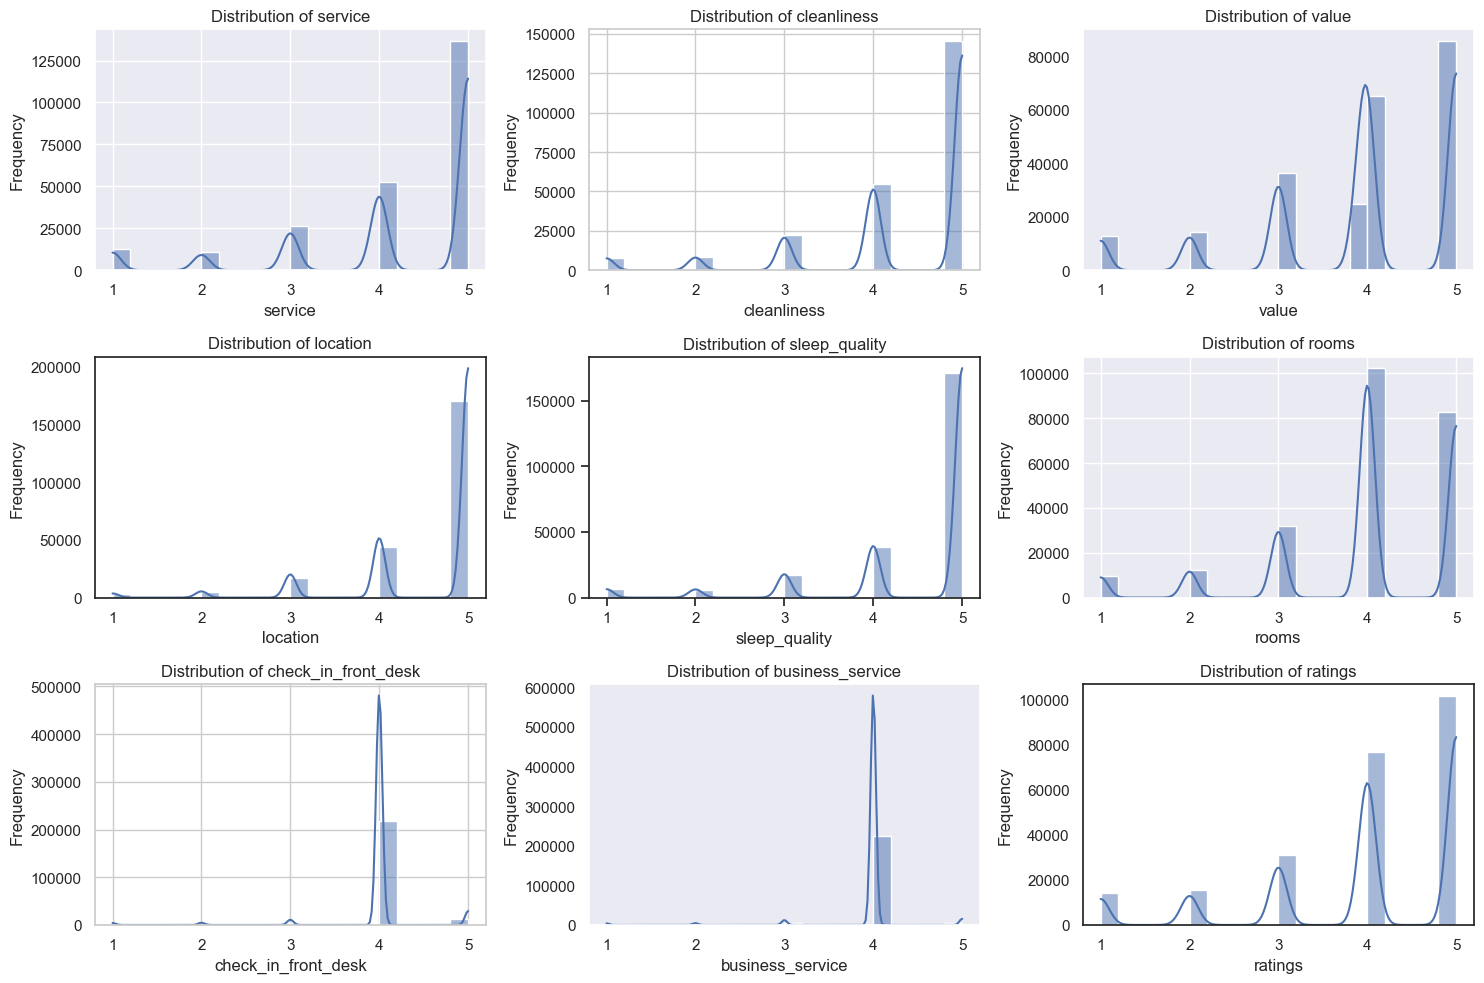

In [10]:
# Set different themes for the plots
themes = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot distributions
for i, column in enumerate(numerical_columns):
    # Apply a different theme for each plot
    sns.set_theme(style=themes[i % len(themes)])  # Cycle through themes
    plt.subplot(3, 3, i + 1)  # Create subplots
    sns.histplot(review[column], bins=20, kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap

The ratings distribution ranges from 1 to 5, with a notable dominance of 5s in the categories of service, cleanliness, value, location, and sleep quality. In contrast, most reviewers rate rooms, front desk service, and business services with a score of 4. Overall, the highest ratings are predominantly 5s, followed by 4s as the second most common rating.The distribution is left-skewed, indicating that most of the data points are concentrated on the right side, with a long tail extending toward the lower values on the left.

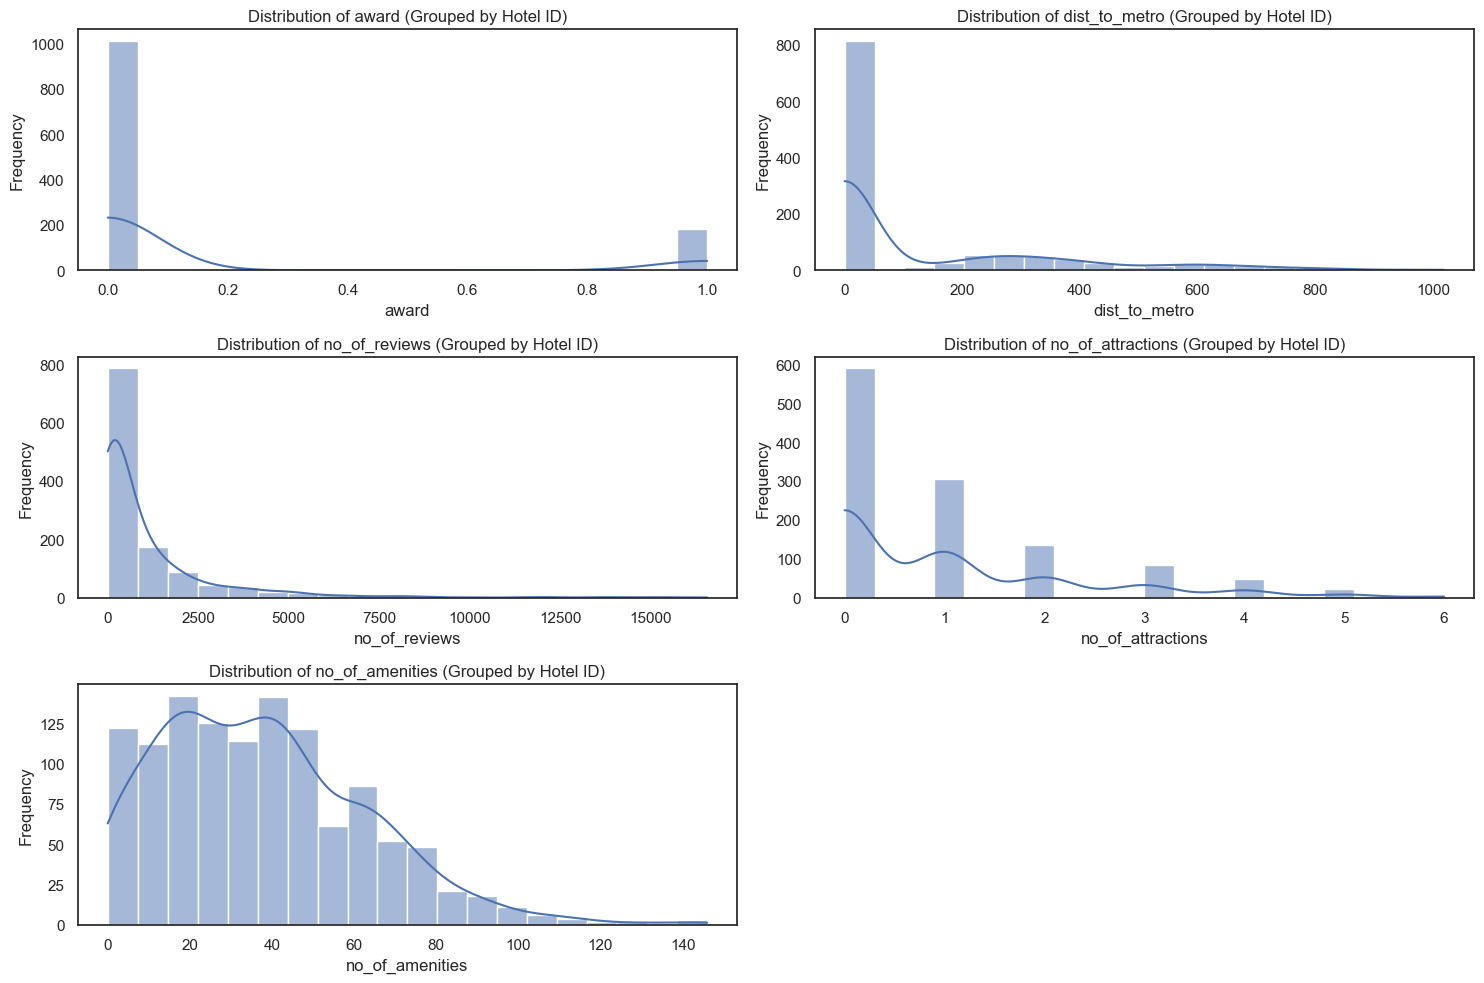

In [11]:
# Specify columns to plot
columns_to_plot = ['award', 'dist_to_metro', 'no_of_reviews', 'no_of_attractions', 'no_of_amenities']

# Group by hotel ID and calculate the mean for the specified columns
# Assuming 'hotel_id' is the identifier for each hotel
review_grouped = review.groupby('id')[columns_to_plot].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the specified columns and plot distributions
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)  # Create subplots
    sns.histplot(review_grouped[column], bins=20, kde=True)  # Plot histogram with KDE
    plt.title(f'Distribution of {column} (Grouped by Hotel ID)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap

The variables ['award', 'dist_to_metro', 'no_of_reviews', 'no_of_attractions', 'no_of_amenities'] are numeric but are grouped by hotel ID. Since a single hotel can have multiple reviews with the same values for award criteria, distance to metro, number of reviews, number of attractions, and number of amenities, it is important to group the data by hotel ID to avoid double counting.

The 'award' variable has only two values: 1 (yes) and 0 (no), indicating whether a hotel has received any awards. The majority of hotels do not have an award.

'dist_to_metro' frequently has a value of 0, indicating that many hotels are not located near a metro station. For those that are nearby, the distance typically ranges from 200 meters to 1 kilometer.

The variables 'no_of_reviews' and 'no_of_attractions' exhibit a right-skewed distribution. The majority of hotels may have a relatively low number of reviews or attractions, while a small number of hotels have a significantly higher number.

The 'no_of_amenities' variable primarily ranges from 20 to 40, although there are some hotels that do not offer any amenities at all.

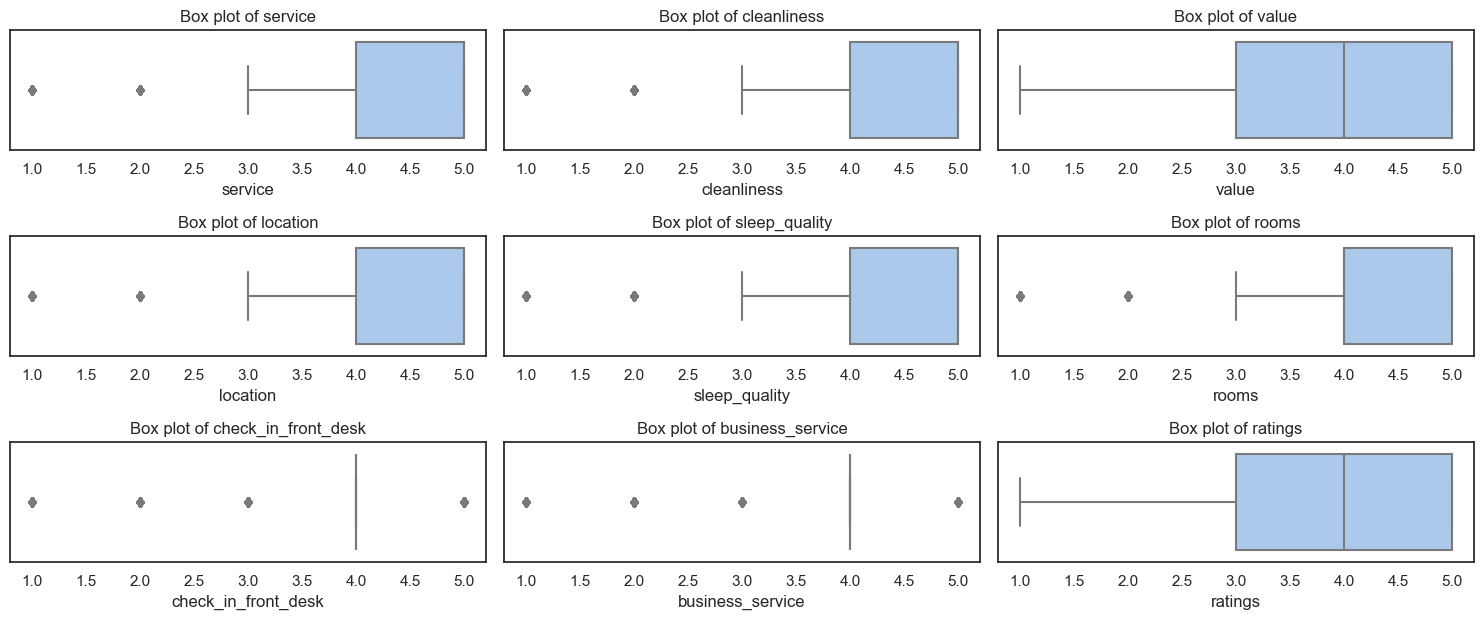

In [12]:
# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=review[column], palette="pastel")
    plt.title(f'Box plot of {column}')

plt.tight_layout()

The box plot reveals outliers in most categories, with the exception of the overall rating.

In [13]:
# Select columns from the 'review' DataFrame that are of numeric data types (float64 and int64)
merge_num_col = review.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the 'id' column from the list of numeric columns
merge_num_col.remove("id")

# Display the final list of numeric column names, excluding 'id'
merge_num_col

['no_of_amenities',
 'dist_to_metro',
 'no_of_attractions',
 'award',
 'no_of_reviews',
 'service',
 'cleanliness',
 'value',
 'location',
 'sleep_quality',
 'rooms',
 'check_in_front_desk',
 'business_service',
 'ratings']

In [14]:
# Check for outliers using IQR method
outlier_info = {}
total_rows = len(review)

# Create a mask for rows to keep
mask = pd.Series([True] * total_rows)

for column in merge_num_col:
    Q1 = review[column].quantile(0.25)
    Q3 = review[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = review[(review[column] < lower_bound) | (review[column] > upper_bound)]
    
    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / total_rows) * 100
    
    # Store outlier information
    outlier_info[column] = {
        'outliers': outliers,
        'percentage': outlier_percentage
    }
    
    # Update the mask to exclude outliers for this column
    mask &= (review[column] >= lower_bound) & (review[column] <= upper_bound)

# Create a DataFrame for outlier percentages
outlier_percentage_df = pd.DataFrame({
    'Column': merge_num_col,
    'Outlier Percentage': [outlier_info[column]['percentage'] for column in merge_num_col]
})

# Remove outliers from the original DataFrame
review = review[mask]

In [16]:
# Reset the index of the 'review' DataFrame, dropping the old index and creating a new sequential index
review.reset_index(drop=True, inplace=True)

#Categorical variables

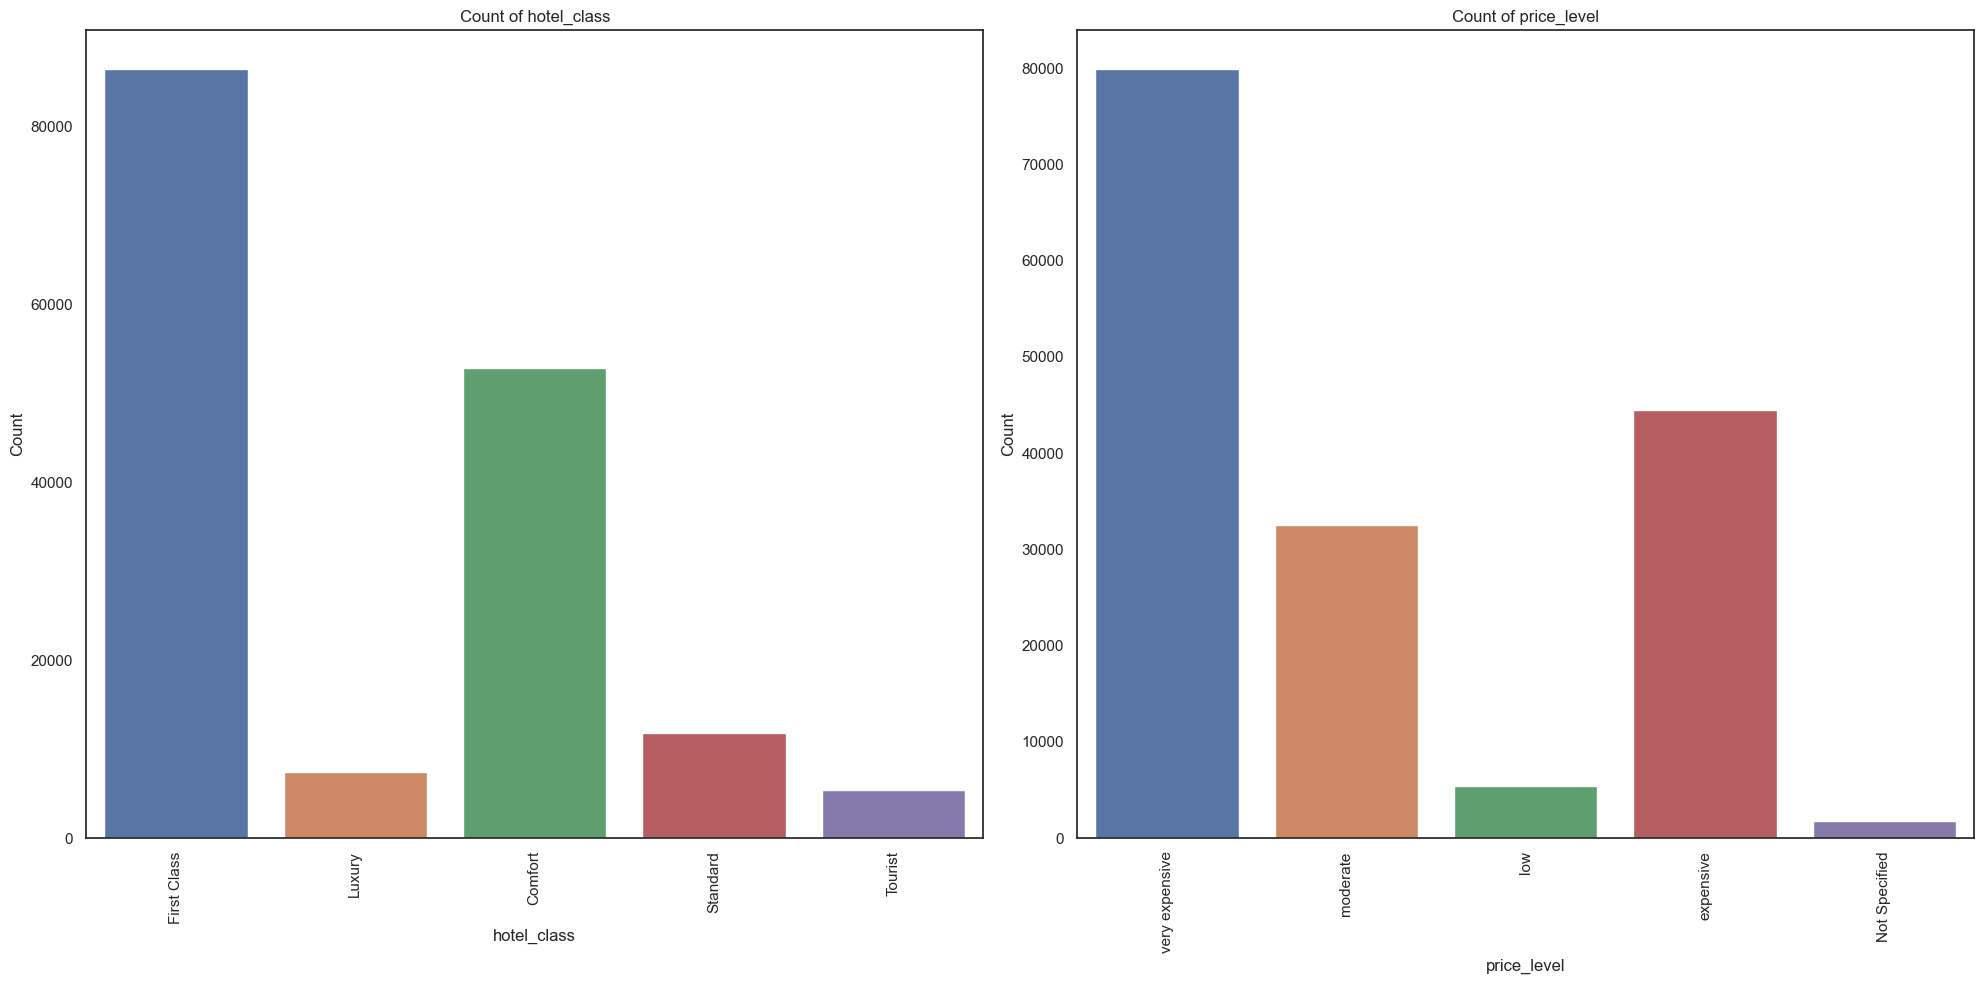

In [18]:
# Set up the matplotlib figure with a 2x4 grid
fig, ax = plt.subplots(1,2, figsize=(20, 10))

# Loop through categorical columns and plot counts
for variable, subplot in zip(categorical_columns, ax.flatten()):
    # Use countplot for categorical variables
    sns.countplot(data=review, x=variable, ax=subplot)
    subplot.set_title(f'Count of {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Count')

    # Rotate x labels for better readability
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout() 

Most hotels are categorized as 'First Class,' followed by 'Comfort' as the next most common category.

Correspondingly, the 'Very Expensive' price level comprises the largest proportion, followed by 'Expensive' and 'Moderate.

In [19]:
import plotly.express as px

# Count the occurrences of each sentiment
sentiment_counts = review['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create a pie chart using Plotly
fig = px.pie(sentiment_counts, 
             names='Sentiment', 
             values='Count', 
             title='Distribution of Sentiment', 
             hole=0.3)  # This creates a donut chart; set hole=0 for a regular pie chart

# Show the figure
fig.show()

The majority of reviews are positive, while negative reviews constitute a negligible portion.

In [20]:
# Remove stop words
stop_words = set(stopwords.words('english'))
remove= ['no', 'not']
stop_words = [word for word in stop_words if word not in remove]
# Create a custom set of stopwords
custom_stopwords = stopwords_lst 
stop_words = STOPWORDS.union(custom_stopwords)  # Combine default stopwords with custom ones


In [21]:
def plot_wordcloud(target, title):
    # Clean text that we want to word cloud. Target will be class 0 (negative reviews) or class 1 (positive reviews)
    text = review[review['sentiment'] == target]['normalized_review'] 

    # Generate the word cloud
    wordcloud = WordCloud(width=2000, 
                          height=1000, 
                          background_color='white', 
                          max_words=50,  # Maximum number of words in the word cloud
                          stopwords=stop_words).generate(' '.join(text))  # Remove stopwords
    
    plt.figure(figsize=(10, 8))
    plt.title(title, fontsize=15, weight='bold')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Removes the axis
    plt.tight_layout()
    plt.show()  # Show the plot


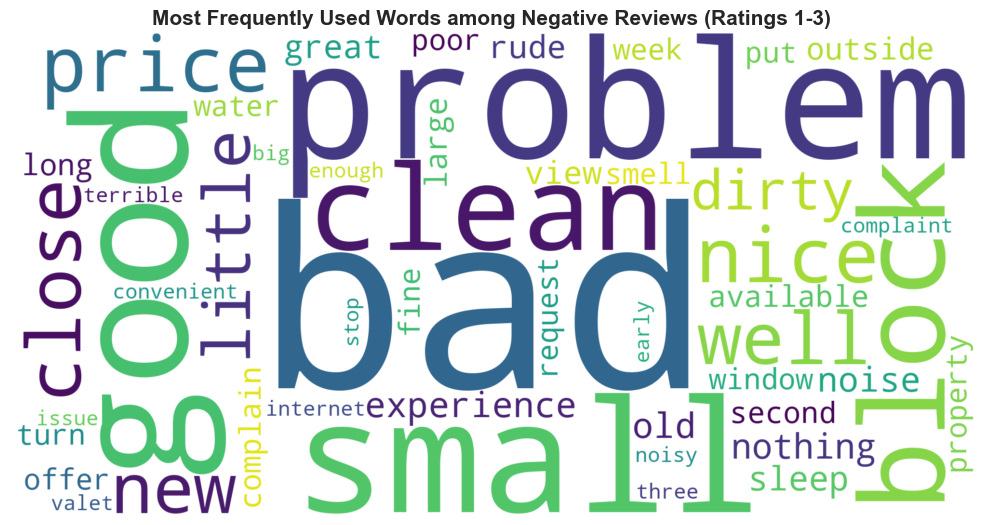

In [22]:
# Wordcloud of the 50 most frequently occurring words among negative reviews
plot_wordcloud(target="negative", title='Most Frequently Used Words among Negative Reviews (Ratings 1-3)')

The larger the word, the higher its frequency of appearance in the reviews. Terms like 'bad,' 'problem,' and 'poor' represent the negative sentiment class.

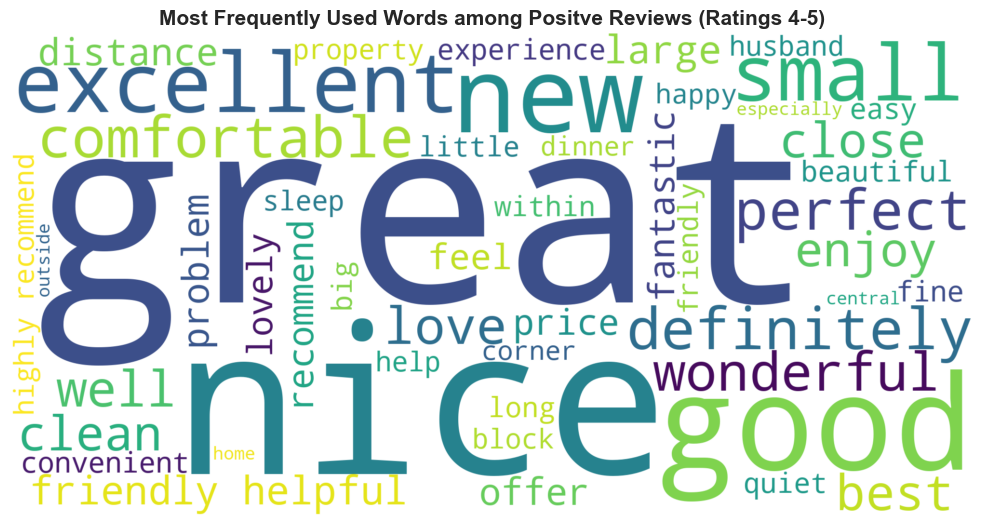

In [23]:
# Wordcloud of the 50 most frequently occurring words among positive reviews
plot_wordcloud(target="positive", title='Most Frequently Used Words among Positve Reviews (Ratings 4-5)')

Words such as 'great,' 'nice,' 'excellent,' 'good,' 'clean,' and 'new' represent the positive sentiment class.

In [24]:
# Calculate the length of each review in 'normalized_review' and create a new column 'length'
review['length'] = review['normalized_review'].str.len()

# Calculate the number of words in each review by splitting the text and applying the length function,
# then store the result in a new column 'no_words'
review['no_words'] = review['normalized_review'].str.split(" ").agg([len])


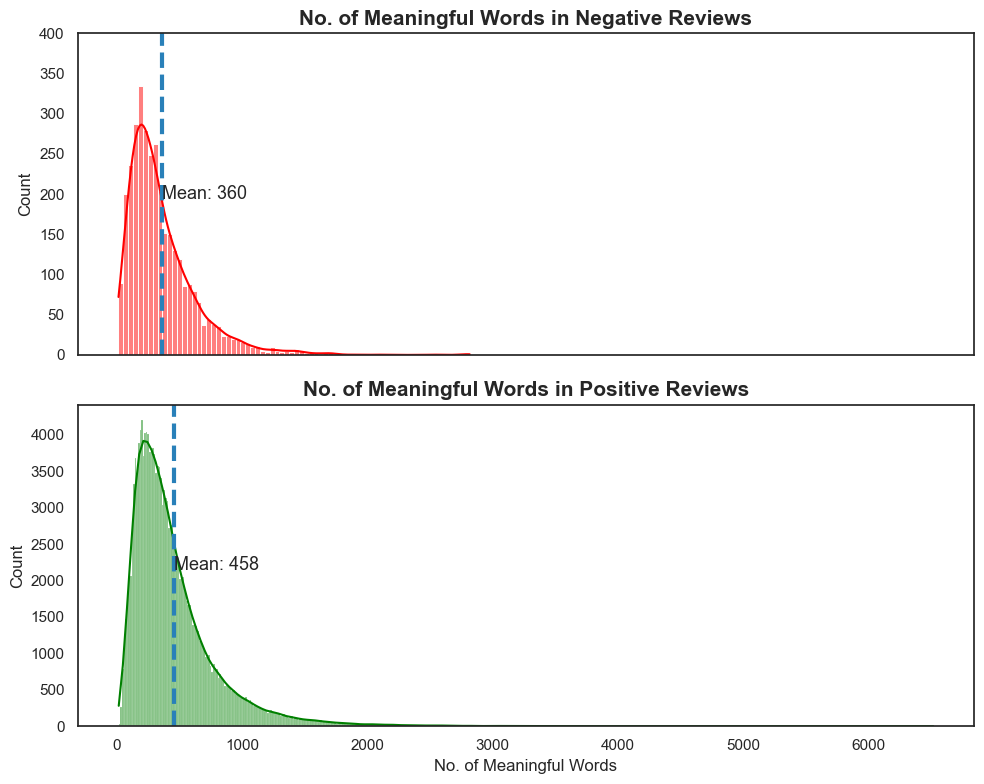

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=False)

# Plots the distribution of the length of negative reviews
neg_len = review[review['sentiment'] == 'negative']['length']
sns.histplot(neg_len, color='red', ax=ax[0], kde=True)  # Use histplot instead of distplot
ax[0].axvline(neg_len.mean(), linestyle='dashed', linewidth=3, c='#2980B9')  # Plot the mean line
mean_neg = round(neg_len.mean())
ax[0].set_ylim(0, 400)
max_neg = ax[0].get_ylim()[1]  # Get the maximum y-limit for the negative review plot
ax[0].text(x=neg_len.mean(),
           y=max_neg * 0.5,  # Adjust y position to 50% of the maximum value
           s=f'Mean: {mean_neg}',
           horizontalalignment='left',
           verticalalignment='center',
           fontsize=13)
ax[0].set_title('Length Negative Reviews', fontsize=15, fontweight='bold')
ax[0].set_xlabel('Length', size=12)

# Plots the distribution of the length of positive reviews
pos_len = review[review['sentiment'] == 'positive']['length']
sns.histplot(pos_len, color='green', ax=ax[1], kde=True)  # Use histplot instead of distplot
ax[1].axvline(pos_len.mean(), linestyle='dashed', linewidth=3, c='#2980B9')  # Plot the mean line
mean_pos = round(pos_len.mean())
max_pos = ax[1].get_ylim()[1]  # Get the maximum y-limit for the positive review plot
ax[1].text(x=pos_len.mean(),
           y=max_pos * 0.5,  # Adjust y position to 50% of the maximum value
           s=f'Mean: {mean_pos}',
           horizontalalignment='left',
           verticalalignment='center',
           fontsize=13)
ax[1].set_title('Length Positive Reviews', fontsize=15, fontweight='bold')
ax[1].set_xlabel('Length', size=12)

plt.tight_layout()

In [27]:
def noWordsFrequency(previews: pd.DataFrame):
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 7))
    ax1 = fig.add_subplot(1, 2, 1)  # Subplot for negative reviews
    ax2 = fig.add_subplot(1, 2, 2)  # Subplot for positive reviews

    # Set titles for each subplot
    ax1.set_title("Negative Reviews", fontsize=16)
    ax2.set_title("Positive Reviews", fontsize=16)

    # Plot histogram for negative reviews
    previews.loc[previews['sentiment'] == 'negative', 'no_words'].hist(bins=30, ax=ax1, color='red', alpha=0.7)
    ax1.set_xlabel("Number of Words", fontsize=14)
    ax1.set_ylabel("Frequency", fontsize=14)
    
    # Mean line for negative reviews
    neg_mean = previews.loc[previews['sentiment'] == 'negative', 'no_words'].mean()
    ax1.axvline(neg_mean, color='blue', linestyle='dashed', linewidth=2)
    ax1.text(x=neg_mean, 
             y=ax1.get_ylim()[1] * 0.9, 
             s=f'Mean: {round(neg_mean)}', 
             horizontalalignment='left', fontsize=12)

    # Plot histogram for positive reviews
    previews.loc[previews['sentiment'] == 'positive', 'no_words'].hist(bins=30, ax=ax2, color='green', alpha=0.7)
    ax2.set_xlabel("Number of Words", fontsize=14)
    ax2.set_ylabel("Frequency", fontsize=14)
    
    # Mean line for positive reviews
    pos_mean = previews.loc[previews['sentiment'] == 'positive', 'no_words'].mean()
    ax2.axvline(pos_mean, color='blue', linestyle='dashed', linewidth=2)
    ax2.text(x=pos_mean, 
             y=ax2.get_ylim()[1] * 0.9, 
             s=f'Mean: {round(pos_mean)}', 
             horizontalalignment='left', fontsize=12)

    # Adjust layout
    fig.tight_layout()

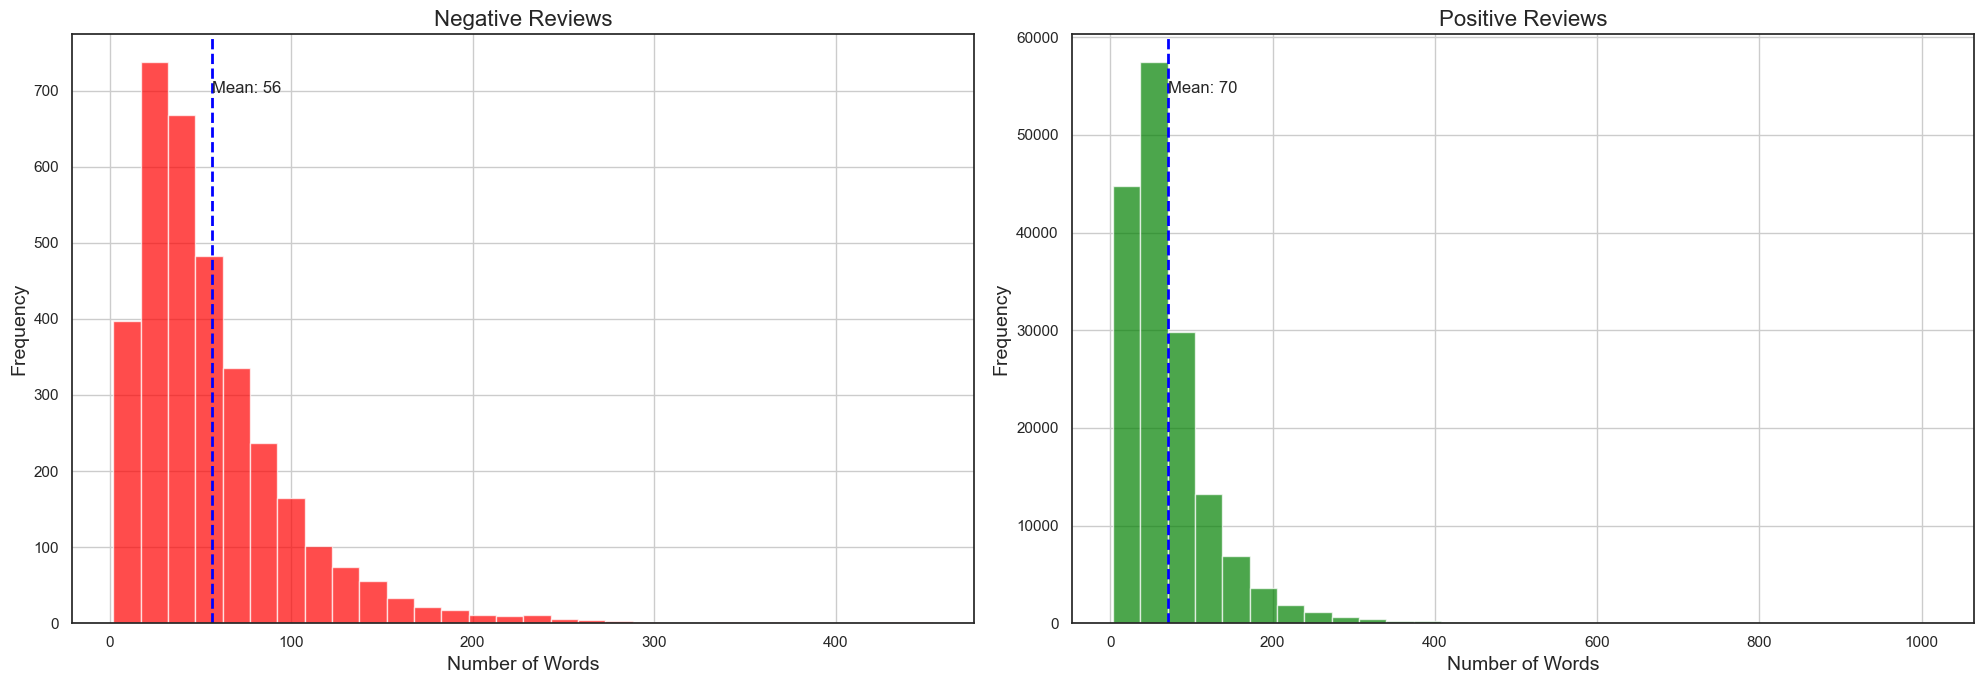

In [28]:
noWordsFrequency(review)

Both distributions are right-skewed, with only a small proportion of posts that have >1000 character or 200 meaningful words. In fact, only  of positive reviews and  of positive reviews have more than 200 meaningful words. The average number of meaningful words in a negative review (56 words) is higher than that in a positive review (70 words). There is also a noticeable higher variance in the number of meaningful words among positive reviews than negative reviews, suggesting that satisfied customers are more likely to write longer reviews 

In [29]:
def regplotLengthNoWords(previews: pd.DataFrame):
    # Create a copy of the DataFrame
    df = previews.copy()

    # Map sentiments directly
    df['sentiment'] = df['sentiment'].apply(lambda x: "Positive" if x == "positive" else "Negative")

    # Set the size of the figure
    plt.figure(figsize=(12, 10))
    
    # Create a regression plot with seaborn
    sns.lmplot(data=df, x='length', y='no_words', hue='sentiment', markers=["o", "s"], palette={"Positive": "green", "Negative": "red"})
    
    # Set titles and labels
    plt.title('Regression Plot of Length vs Number of Words', fontsize=16)
    plt.xlabel('Length of Review', fontsize=14)
    plt.ylabel('Number of Words', fontsize=14)

<Figure size 1200x1000 with 0 Axes>

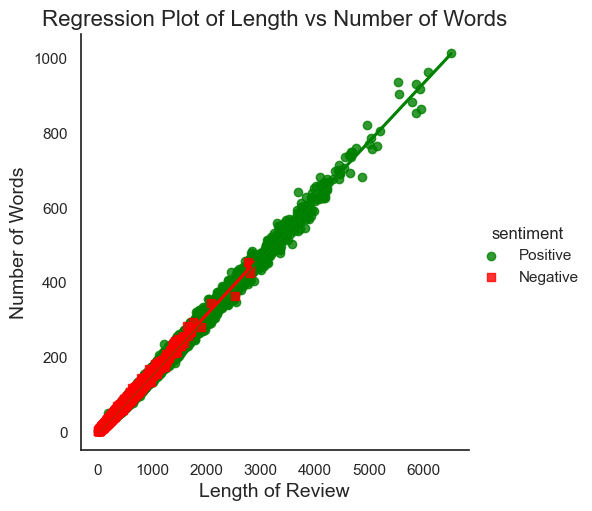

In [30]:
regplotLengthNoWords(review);

This chart provides strong evidence of a positive correlation between length and the number of words, with the two regression lines nearly overlapping. Additionally, we observe some overlap between the classes in the feature label.

In [31]:
def plot_scatter_relationships(review: pd.DataFrame, target_variable: str):
    numerical_columns = review.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Remove the target variable from the list of numerical columns
    if target_variable in merge_num_col:
        numerical_columns.remove(target_variable)

    # Create scatter plots
    n = len(merge_num_col)
    fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(15, 5 * ((n + 1) // 2)))
    axes = axes.flatten()

    for i, column in enumerate(merge_num_col):
        axes[i].scatter(review[column], review[target_variable], alpha=0.6)
        axes[i].set_title(f'{column} vs {target_variable}', fontsize=14)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_variable)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()

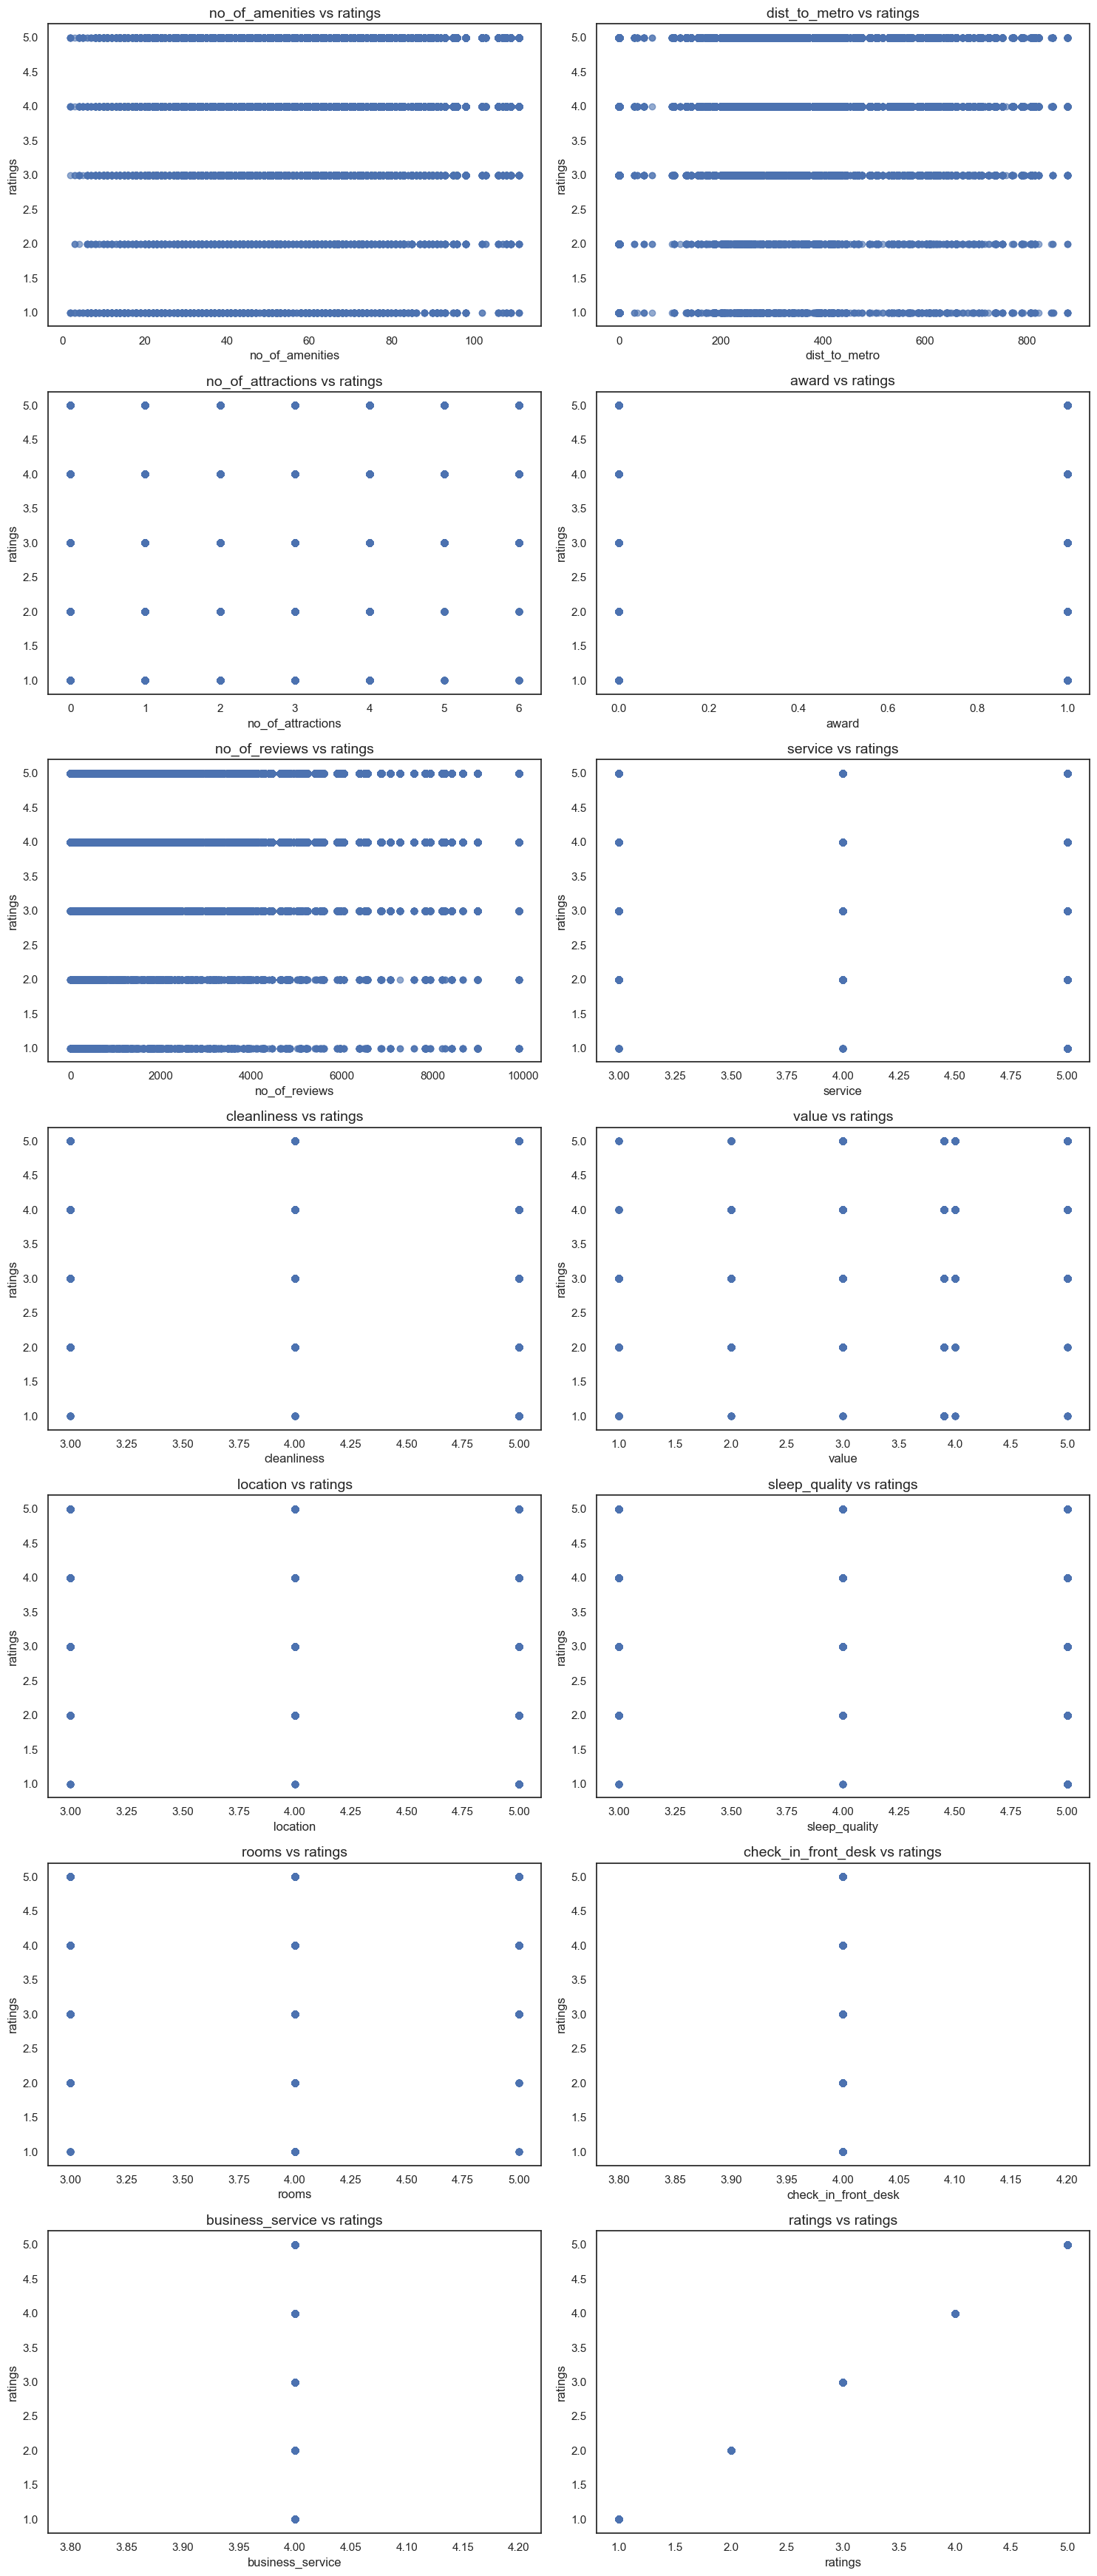

In [32]:
plot_scatter_relationships(review, "ratings")

The plot_scatter_relationships function creates scatter plots to visualize the relationship between a target variable and various numerical features in a DataFrame. The points are scattered without any discernible pattern, it suggests that there is little to no correlation between the variables.

In [33]:
def plot_pairplot_with_target(review: pd.DataFrame, target_variable: str):
    numerical_columns = review.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Remove the target variable from the list of numerical columns
    if target_variable in numerical_columns:
        numerical_columns.remove(target_variable)

    # Create a new DataFrame for pairplot
    plot_data = review[numerical_columns + [target_variable]]

    # Create a pairplot
    sns.pairplot(plot_data, diag_kind='kde', hue=target_variable, palette='viridis')
    
    # Show the plot
    plt.suptitle('Pairplot of Numerical Variables with Target Variable', y=1.02, fontsize=16)

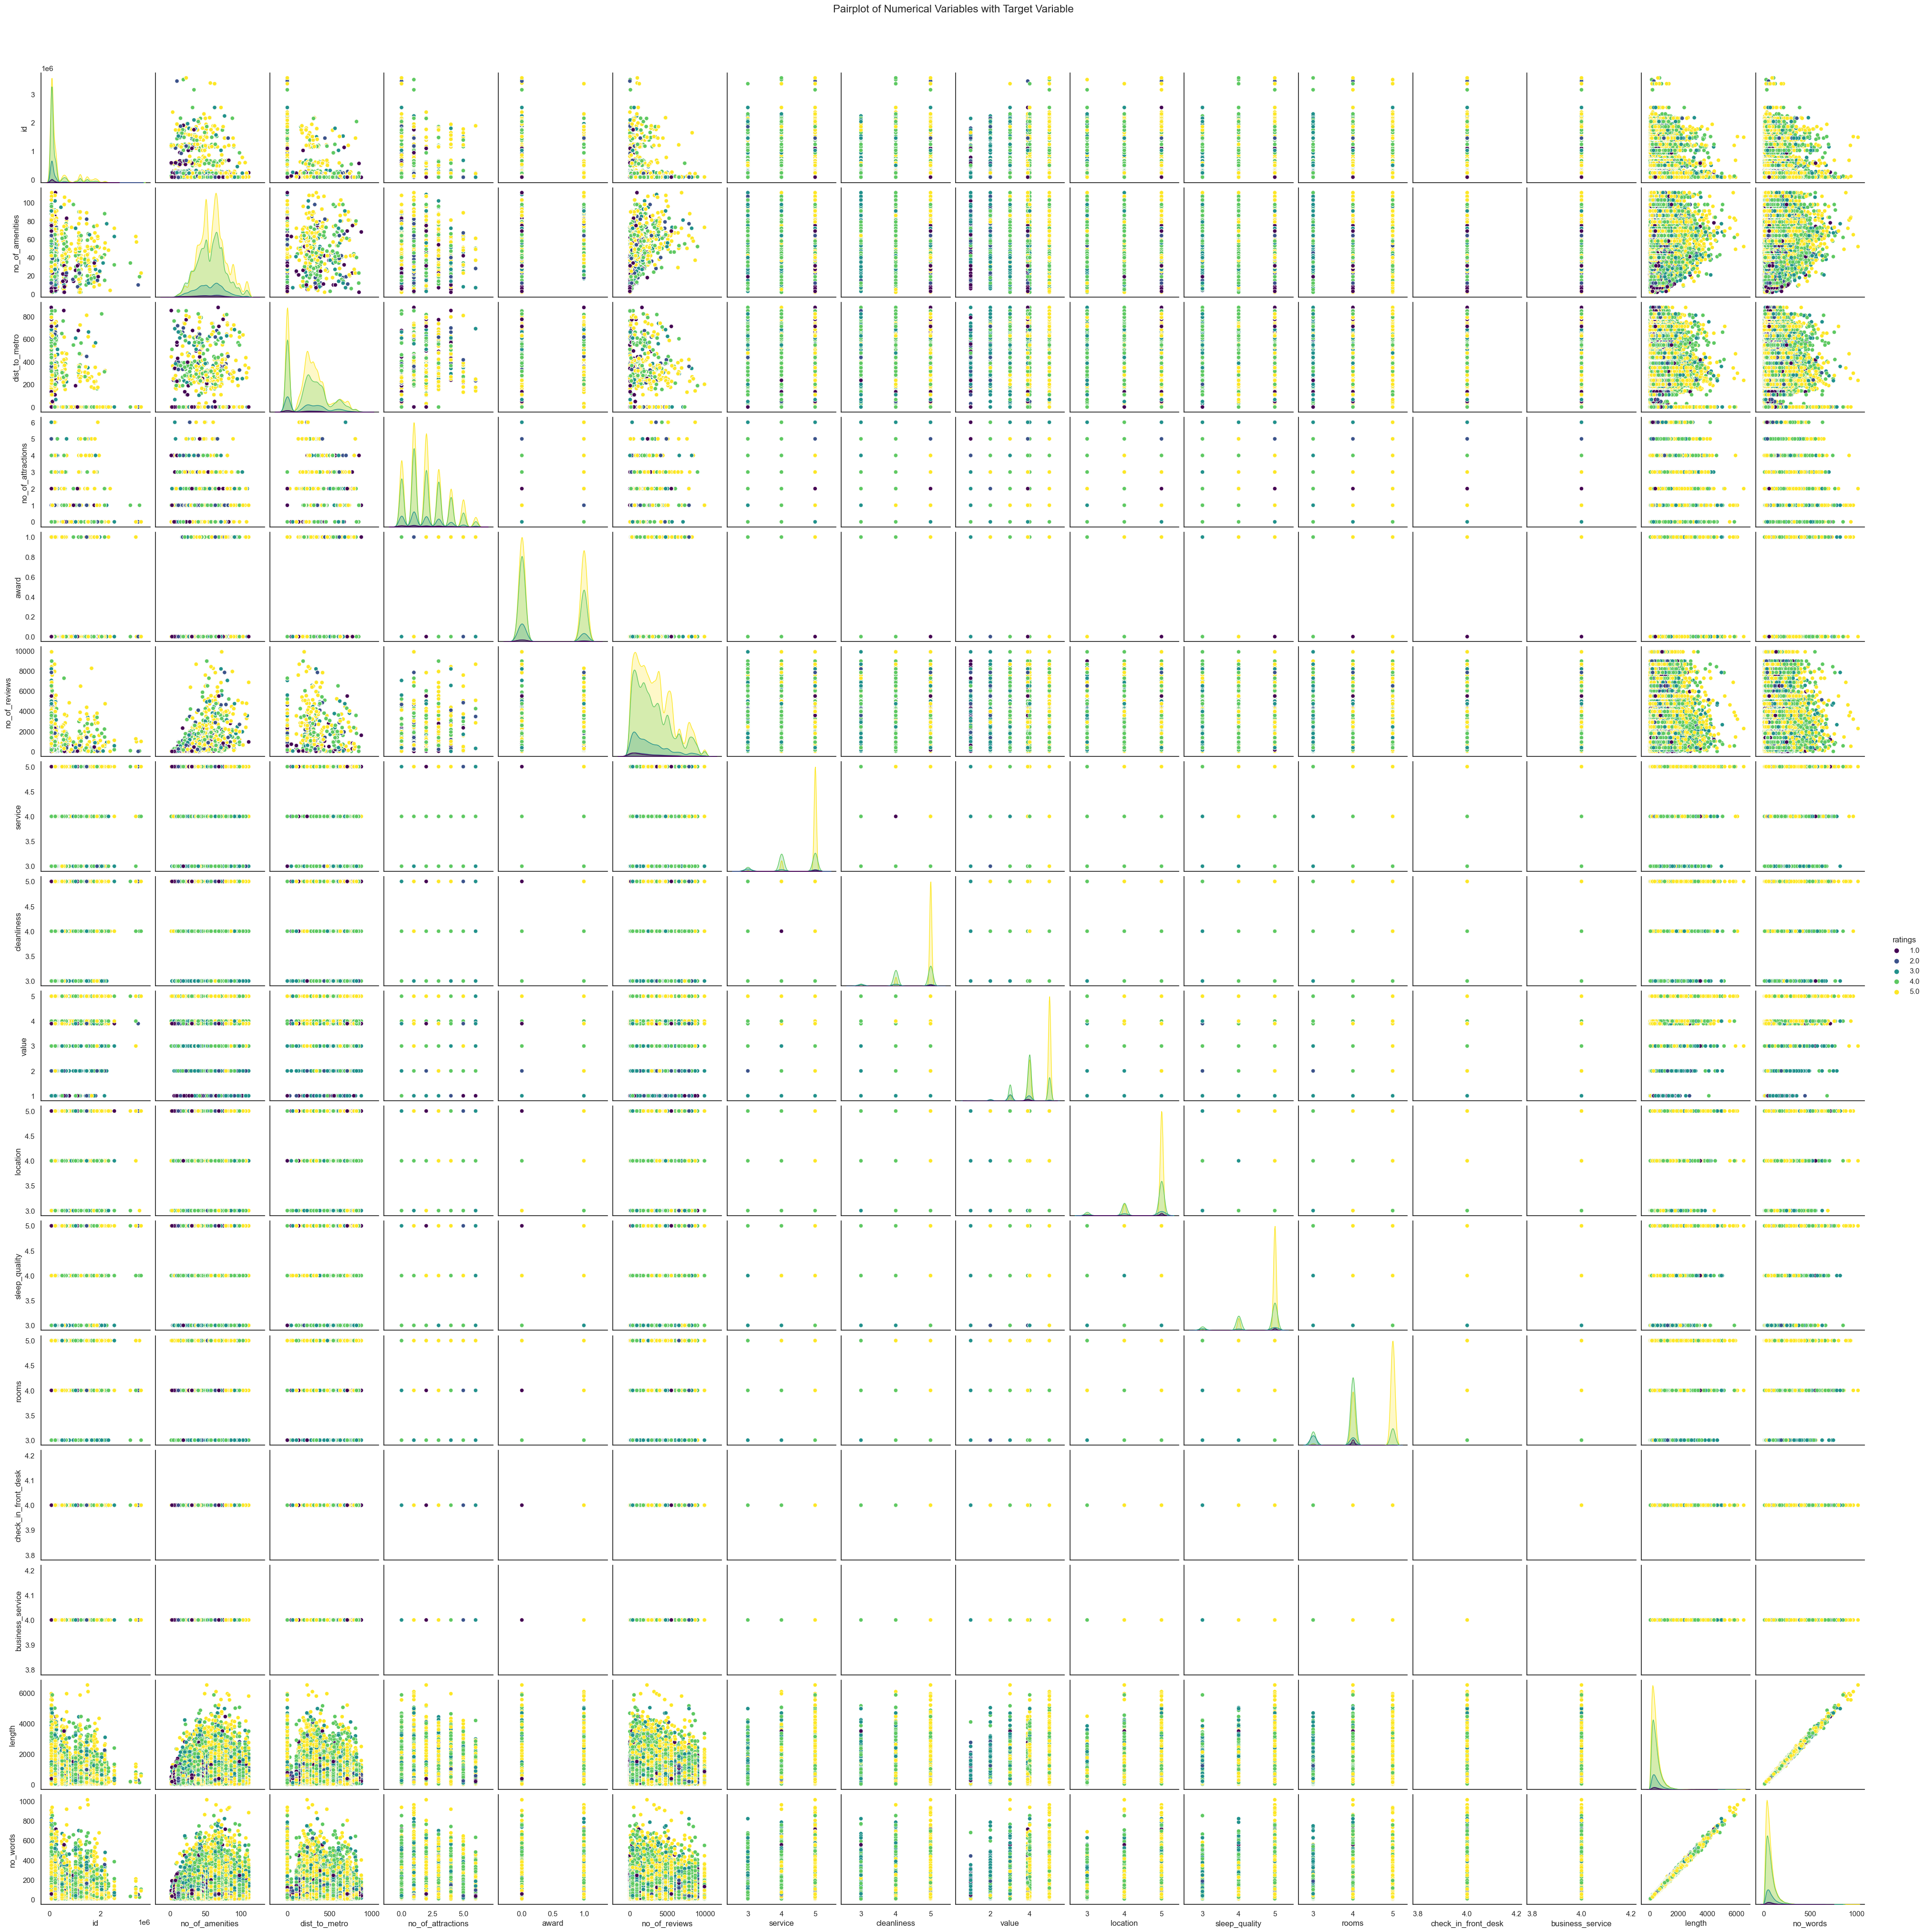

In [34]:
plot_pairplot_with_target(review, "ratings")

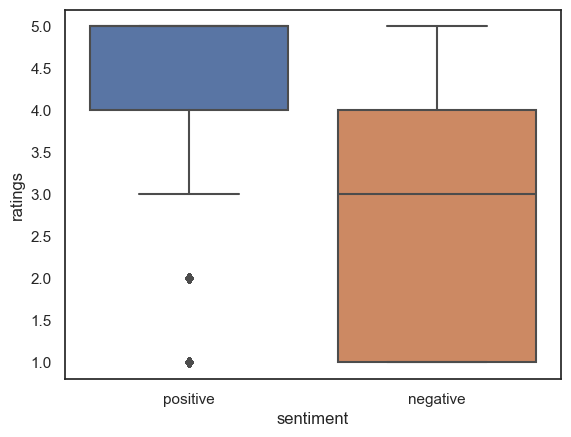

In [36]:
# Create a box plot to visualize the distribution of 'ratings' across different 'sentiment' categories
sns.boxplot(
    x="sentiment",    # Categorical variable on the x-axis
    y='ratings',      # Numerical variable on the y-axis
    data=review       # DataFrame containing the data to plot
);

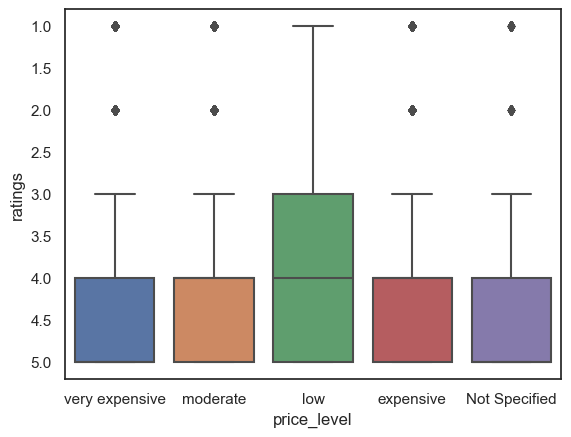

In [37]:
# Create a box plot to visualize the distribution of 'ratings' across different 'price_level' categories
sns.boxplot(
    x="price_level",  # Categorical variable on the x-axis
    y='ratings',      # Numerical variable on the y-axis
    data=review       # DataFrame containing the data to plot
);

# Invert the y-axis to display higher ratings at the top of the plot
plt.gca().invert_yaxis();


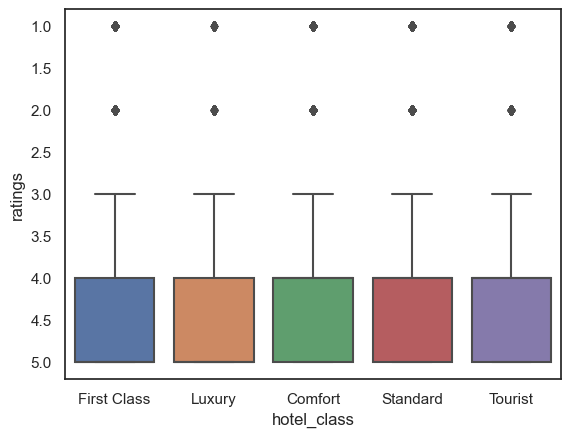

In [38]:
# Create a box plot to visualize the distribution of 'ratings' across different 'hotel_class' categories
sns.boxplot(
    x="hotel_class",  # Categorical variable on the x-axis representing hotel classes
    y='ratings',      # Numerical variable on the y-axis representing ratings
    data=review       # DataFrame containing the data to plot
);

# Invert the y-axis to display higher ratings at the top of the plot
plt.gca().invert_yaxis();